In [3]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt

import os

from sklearn import linear_model
from sklearn import metrics
from sklearn.decomposition import PCA

In [1]:
folders = os.listdir('E:\Leak Detection Project\Hanoi_CMH') #You can also use full path.
folders.remove('Hanoi_CMH.inp')
folders.remove('Labels.csv')

def Demands(Scenario):
    '''
    Importing all the Demands from the Scenario 1 into a Dataframe
    '''

    Demands_L = []
    df1 = pd.read_csv (r"E:\Leak Detection Project\Hanoi_CMH\\" + Scenario + "\\Demands\\Node_" + str(1) + '.csv')
    Demands_L.append(df1)
    for i in range(2,33):
        df = pd.read_csv (r"E:\Leak Detection Project\Hanoi_CMH\\"+ Scenario +"\\Demands\\Node_" + str(i) + '.csv')
        df.rename(columns = {'Value':'Node'+str(i)}, inplace = True)
        Demands_L.append(df['Node'+str(i)])

    Demands = pd.concat(Demands_L, axis=1)
    Demands.set_index("Index", inplace = True)
    Demands.rename(columns = {'Value':'Node1'}, inplace = True)
    return Demands


def Flows(Scenario):
    '''
    Importing all the Flows from the Scenario 1 into a Dataframe
    '''

    Flows_L = []
    df1 = pd.read_csv (r'E:\Leak Detection Project\Hanoi_CMH\\'+ Scenario +'\\Flows\\Link_1.csv')
    Flows_L.append(df1)
    for i in range(2,35):
        df = pd.read_csv (r"E:\Leak Detection Project\Hanoi_CMH\\"+ Scenario +"\\Flows\Link_" + str(i) + '.csv')
        df.rename(columns = {'Value':'Link'+str(i)}, inplace = True)
        Flows_L.append(df['Link'+str(i)])

    Flows = pd.concat(Flows_L, axis=1)
    Flows.set_index("Index", inplace = True)
    Flows.rename(columns = {'Value':'Link1'}, inplace = True)
    return Flows


def Pressures(Scenario):
    '''
    Importing all the Pressures from the Scenario 1 into a Dataframe
    '''
    
    Pressures_L = []
    df1 = pd.read_csv (r"E:\Leak Detection Project\Hanoi_CMH\\"+ Scenario +"\\Pressures\\Node_1.csv")
    Pressures_L.append(df1)
    for i in range(2,33):
        df = pd.read_csv (r"E:\Leak Detection Project\Hanoi_CMH\\"+ Scenario +"\\Pressures\\Node_" + str(i) + '.csv')
        df.rename(columns = {'Value':'Node'+str(i)}, inplace = True)
        Pressures_L.append(df['Node'+str(i)])

    Pressures = pd.concat(Pressures_L, axis=1)
    Pressures.set_index("Index", inplace = True)
    Pressures.rename(columns = {'Value':'Node1'}, inplace = True)
    return Pressures

#Importing all the Leaks
Leaks = {}
folders = os.listdir('E:\Leak Detection Project\Hanoi_CMH') #You can also use full path.
folders.remove('Hanoi_CMH.inp')
folders.remove('Labels.csv')

for folder in folders:
    Leak = []
    files = os.listdir('E:\Leak Detection Project\Hanoi_CMH\\' + folder + '\\Leaks')
    
    if len(files) == 0 : 
        leak = None
        Leak.append(leak)
        Leaks[folder]= Leak
    if len(files) > 0:
        for i in range(1,len(files)+1,2):
            leak = pd.read_csv(r"E:\Leak Detection Project\Hanoi_CMH"+ '\\' + folder +'\\' + 'Leaks\\' + files[i])
            Leak.append(leak)
            Leaks[folder] = Leak

FileNotFoundError: [Errno 2] No such file or directory: 'E:\\Leak Detection Project\\Hanoi_CMH'

In [3]:
#Getting the attributes from the Flows from the dataset
Seq = []
for i in range(1,300):
    df_ = Flows('Scenario-' + str(i))
    Seq.append(df_.values.reshape(1,-1)[0])
Seq

#Getting the leak node from the leak database
Seql = list()
sc = list()

for i in range(1,300):
    try:
        k = list()
        for j in range(len(Leaks['Scenario-' + str(i)])):
            k.append(int(Leaks['Scenario-' + str(i)][j].values[0][1]))
        Seql.append(k)
    except:
        k = [0]
        Seql.append(k)
print(len(Seql))

299


1000
763 237


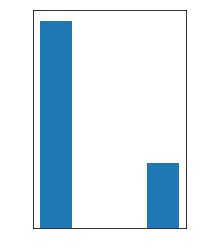

In [4]:
LeakType = list()
sc = list()

for i in range(1,1001):
    try:
        k = list()
        for j in range(len(Leaks['Scenario-' + str(i)])):
            k.append(Leaks['Scenario-' + str(i)][j].values[3][1])
        LeakType.append(k)
    except:
        k = [0]
        LeakType.append(k)
print(len(LeakType))

abrupt, incipient = 0,0
for i in LeakType:
    for j in i:
        if j == ' incipient': incipient = incipient + 1
        if j == ' abrupt': abrupt = abrupt + 1
# print(abrupt, incipient)

Leaky, NonLeaky = 0,0
for i in LeakType:
    if i[0] == 0 : NonLeaky += 1
    else: Leaky += 1
print(Leaky, NonLeaky)

# fig = plt.figure(121)
# ax = fig.add_subplot(121)
# plt.bar(x=['abrupt', 'incipient'], height=[506, 514], width = 0.3)
# ax.xaxis.label.set_color('white') 
# ax.yaxis.label.set_color('white') 
# ax.tick_params(axis='x', colors='white')  
# ax.tick_params(axis='y', colors='white')  

fig = plt.figure(121)
ax = fig.add_subplot(121)
plt.bar(x=['Leaky Scenarios', 'Non-Leaky Scenarios'], height=[763, 237], width = 0.3)
ax.xaxis.label.set_color('white') 
ax.yaxis.label.set_color('white') 
ax.tick_params(axis='x', colors='white')  
ax.tick_params(axis='y', colors='white') 

In [5]:
# Leaks['Scenario-' + str(i)][j].values[0][1]
Leaks['Scenario-4'][0].values[3][1]

' abrupt'

In [6]:
target = []
for i in Seql:
    if i[0] ==  0:
        target.append(0)
    else: target.append(1)
print(target)

[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1]


In [7]:
# #Creating a dataframe for the target values to be used in the Decision Tree classifier shape = (100,32) using pressures
# cols = [i for i in range(1,33)]
# ind = [i for i in range(1,len(Seql)+1)]
# target = pd.DataFrame(np.zeros((len(Seql),32)), columns = cols, index = ind)

# for i in range(len(Seql)):
#     for j in range(len(Seql[i])):
#         if Seql[i][j] == 0 : continue
#         target[Seql[i][j]][i+1] = 1

# target

In [2]:
#Splitting the data into train set
trainx = Seq[:240] 
trainy = target[:240]
trainx[0].shape
print(trainy)

#Splitting the data into the test set
testx = Seq[240:]
testy = target[240:]
print(testy)

NameError: name 'Seq' is not defined

In [9]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(trainx, trainy)

DecisionTreeClassifier(random_state=0)

In [10]:
print(clf.score(trainx,trainy))
print(clf.score(testx,testy))
print(clf.get_depth())

1.0
0.6440677966101694
6


## Random Forest 

In [12]:
#Without any hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(trainx,trainy)

print(clf_rf.score(trainx,trainy))
print(clf_rf.score(testx,testy))


1.0
0.7796610169491526


In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 15, num = 15)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(trainx, trainy)

print(rf_random.best_params_)

{'bootstrap': [True, False],
 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'n_estimators': 70, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': True}


In [1]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators= 70,
                               min_samples_split = 5,
                              min_samples_leaf = 1,
                                 max_features= 'sqrt',
                                  max_depth= 3,
                                 bootstrap= True)
clf_rf.fit(trainx, trainy)

print(clf_rf.score(trainx,trainy))
print(clf_rf.score(testx,testy))

NameError: name 'trainx' is not defined

In [15]:
clf_rf.estimators_[0]

DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_leaf=2,
                       random_state=209652396)

In [16]:
print([i for i in range(1,10)])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(clf_rf, out_file='tree.dot', 
# #                 feature_names = iris.feature_names,
#                 class_names = [i for i in range(1,33)],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)

# # Convert to png using system command (requires Graphviz)
# from subprocess import call
# call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# # Display in jupyter notebook
# from IPython.display import Image
# Image(filename = 'tree.png')

from sklearn import tree
fig = plt.figure(figsize=(25,20))
# fn=data.feature_names
# cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf_rf.estimators_[0],
               feature_names = [str(i) for i in range(1, len(trainx[0]+1))], 
               class_names=[str(i) for i in range(1,33)],
               filled = True);
fig.savefig('rf_individualtree.png')

0.8125
0.8305084745762712
[[ 0  9]
 [ 1 49]]


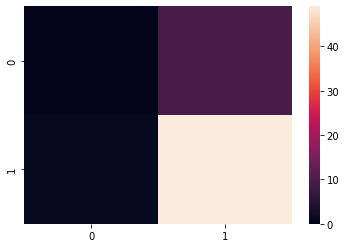

In [17]:
print(clf_rf.score(trainx,trainy))
print(clf_rf.score(testx,testy))
from sklearn.metrics import confusion_matrix

# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(testy, clf_rf.predict(testx))
print(CM)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(CM)
plt.show()

# Deep Learining models

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import datasets, layers, models
from keras import metrics

model = Sequential()

model.add(layers.Conv2D(2, kernel_size=3, strides=1, activation='relu', name = 'conv0',input_shape=(17520, 34,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(2, kernel_size=3, strides=1, activation='relu',name = 'conv1'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

history = model.fit(
    trainx,
    trainy,
    validation_data = (testx,testy),
    batch_size=48,
    epochs=10)

model.predict(testx)